In [24]:
#this is to plot inside the notebook
%matplotlib inline

# Let's start by importing the libraries you will be using in this assignment
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import matplotlib

# A seed for the random number generator so all results are reproducible
np.random.seed(15)

# Makes our plots look nicer
matplotlib.style.use("seaborn-notebook")

# Let's also hide unnecessary warnings
import warnings
warnings.filterwarnings('ignore')

# Assignment 1 Set 2: Learning Categories for Mammals and Birds

## A Perceptron for Mammals and Birds
This part of the assignment is designed to look at neural networks in the context of a more complicated classification problem, and to look at a data set related to human concepts and categories.


### Classifying animals

We are going to figure out whether a perceptron can learn to distinguish animals into two classes: mammals and birds. In the data folder, there should be 9 different files. 

Load the data in the notebook:

In [25]:
# import the data to train the network on
birds = np.genfromtxt(open('./data/birds.txt', "rb"), delimiter=",").T
mammals = np.genfromtxt(open('./data/mammals.txt', "rb"), delimiter=",").T

birds_tok = np.genfromtxt(open('./data/birds_tok.txt', "rb"),dtype='str', delimiter=",")
mammals_tok = np.genfromtxt(open('./data/mammals_tok.txt', "rb"),dtype='str', delimiter=",")

feats = np.genfromtxt(open('./data/feats.txt', "rb"),dtype='str', delimiter=",")

To train the perceptron, we will be using data from [McRae et al. (2005)(1)](#references) . You may want to have a quick read through the paper before doing the assignment.

To inspect the data you can use: 
    
`print(filename)` 

The **birds** and **mammals** matrices should have 20 rows and 16 columns. Each column in the matrix corresponds to a visual feature (e.g., has legs, flies) and each row to an animal (e.g., stork, pigeon). The features are 16 in total, and the animals are 20 per matrix (i.e., 20 birds and 20 mammals).

Inspect the different files in the notebook, and make sure that they are in the correct dimensions (using .shape).

( 2 points)

In [26]:

print(birds)
print(mammals)
print(birds_tok)
print(mammals_tok)
print(feats)

# raise NotImplementedError()

[[0.         0.         0.06329114 0.         0.10126582 0.11392405
  0.27848101 0.         0.         0.         0.         0.
  0.         0.         0.07594937 0.        ]
 [0.         0.         0.         0.         0.15107914 0.
  0.         0.         0.         0.         0.         0.07194245
  0.         0.         0.         0.05035971]
 [0.09615385 0.         0.10897436 0.         0.13461538 0.
  0.05769231 0.         0.         0.         0.13461538 0.06410256
  0.         0.         0.05769231 0.        ]
 [0.04761905 0.         0.22857143 0.         0.1047619  0.
  0.14285714 0.         0.         0.         0.         0.17142857
  0.         0.         0.         0.        ]
 [0.19       0.         0.1        0.         0.06       0.
  0.11       0.         0.         0.         0.         0.
  0.         0.         0.         0.09      ]
 [0.         0.         0.21348315 0.         0.16853933 0.
  0.11235955 0.         0.         0.         0.         0.15730337
  0. 

In [27]:
# compute the shapes of the birds and mammals matrices here
# birds_shape =  ...      
# mammals_shape = ...  
# animal_tokens = ...


birds_shape = birds.shape
mammals_shape = mammals.shape
birds_tok_shape = birds_tok.shape
mammals_tok_shape = mammals_tok.shape
feats_shape = feats.shape

#raise NotImplementedError()

In [28]:
"""Check that *mammals* and *birds* matrices are the  correct shape"""
assert(birds_shape == mammals_shape)
assert(mammals_shape == (20,16))

The features are defined in the vector `feats`, the birds are defined in vector `birds_tok`, and the mammals in vector `mammals_tok`. 

The visual features were elicited from humans who were presented with a word (e.g., *tiger*) and asked to list its properties. The cells in the mammals and birds matrices correspond to the number of humans who listed a specific feature for each word. The counts are normalized so that each matrix row sums to one.

The goal is to train a perceptron that distinguishes between mammals and birds, by deciding whether a given input is a bird. In other words, the perceptron should output 1 in the case of a bird and 0 in the case of a mammal. You will need a matrix, input, containing all training examples, and a target vector, targets birds, whose entry i is 1 if example i is a bird, and 0 otherwise (use `np.zeros(n)` and `np.ones(n)`) for this.

For this, use `np.concatenate((matrix1,matrix2))` and use `np.zeros(n)` and `np.ones(n))` for the target vector. 

(1 point)

In [29]:
# create the training data matrix X_train and target vector y_train
# X_train =  ...   # concatenate birds and mammals
# y_train =  ...   # 1 if bird, 0 if mammal 
# tokens_train = ... # concatenate animal names


X_train = np.concatenate((birds, mammals))
y_train = np.concatenate((np.ones(20),np.zeros(20)))
tokens_train = np.concatenate((birds_tok,mammals_tok))

#raise NotImplementedError()

In [30]:
"""Check that the training and target matrices are in the correct shape"""
assert(np.shape(X_train) == (40,16))


Now create the perceptron, similar to how we created the MLP and linear regression in assignment 1 part 1. Create a new perceptron and fit it to the data like we did in task 1.

(2 points)


In [31]:
#import the perceptron model from scikit-learn
from sklearn.linear_model import Perceptron

# Create Perceptron 
net = Perceptron()

# Fit network to the data X_train and y_train
net.fit(X_train, y_train)

# Make predictions on training data 
# predictions = ...
predictions = net.predict(X_train)

# raise NotImplementedError()

Report the categorization error of the perceptron on the training data using the mean_squared_error function imported in the cell below. 

(2 points)

In [32]:
# import mean squared error from scikit-learn
from sklearn.metrics import mean_squared_error
# calculate MSE here
# MSE = mean_squared_error(... , ...)
MSE = mean_squared_error(predictions, y_train)

# raise NotImplementedError()

In [33]:
''' check for MSE value'''
assert MSE is not None


Did the model classify all examples correctly? You can see which examples were classified incorrectly by looking at the differences between the `.predict(data)` array and the target array.

(2 points)

In [34]:
print("Train =", y_train)
print("Predict =", predictions)
print("Mean Squared Error =", MSE)
accuracy = net.score(X_train,y_train)
print("Mean Accuracy =", accuracy) # prints the mean accuracy on the given test data and labels.

#raise NotImplementedError()

Train = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Predict = [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Mean Squared Error = 0.0
Mean Accuracy = 1.0


Briefly discuss the classification results. 

(3 points)

The Mean Squared Error is 0.0.

We have trained the model from a set of data. When we tested the model with same set of data that we trained it with, it gives us an MSE of 0.0 because the model had learned from the data.

# Comparing different models.

Now we'll be using a slightly more complicated neural network, resembling the one we saw in Tutorial 3. It has more units in its hidden layer, but otherwise it's very similar. It might be helpful to know that unlike our in-class example, the weights don't always start at zero or another fixed value. Like with the perceptron, fit the new network to the training data and assess whether it's learned the correct classification by making it predict the categories of the animals it's been trained on.


(3 points)

In [35]:
#Let's create the network - we use the logistic sigmoid function (logistic) as activation function
# and stochastic gradient descent ('sgd') to train the network
from sklearn.neural_network import MLPClassifier

net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=.08, max_iter=200)

# fit network here
net2.fit(X_train,y_train)

# predict categories of training data here
net2.predict(X_train)

# raise NotImplementedError()

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

Calculate the MSE of the new network and examine its performance.

(2 points)

In [36]:
# MSE_result = ...
MSE_result = mean_squared_error(net2.predict(X_train),y_train)
MSE_result
# raise NotImplementedError()

0.0

In [37]:
'''test that MSE result is not NoneType'''
assert MSE_result is not None


 Did the model learn the correct classification with the set parameters? Discuss. 
 
 (2 points)

The Mean Squared Error is 0.0.

This means that the set parameters have allowed the model to learn and understand the dataset precisely. Therefore, when we trained it with the same data it learned, the model was able to learn the features of the animals and classify them correctly into their respective categories with no errors.

Now, recreate and re-fit the model ten times to the training data (`using net2.fit` and `net2.predict`), and compare the performances. To do this, store the MSE of each run in an array.

(2 points)

In [38]:
# MSE_runs = []  # create an array to store each result

    
# for i in range(10):  # iterate 10 times
    # net2 = ...              recreate model
    #                         fit model to training data (X_train, y_train)
    # net_2_predictions = ... predictions
    
    # MSE = ...               compute MSE
    # MSE_runs.append(MSE)  # this stores the result of one run to the MSE_runs array 
    
MSE_multiple_runs = []

for i in range(10):
    net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=.08, max_iter=200)
    net2.fit(X_train,y_train)
    net_2_predictions = net2.predict(X_train)
    MSE = mean_squared_error(net_2_predictions,y_train)
    MSE_multiple_runs.append(MSE)
    
MSE_multiple_runs
#raise NotImplementedError()


[0.0, 0.275, 0.0, 0.0, 0.0, 0.125, 0.0, 0.575, 0.0, 0.85]

In [39]:
''' check length of MSE array'''
assert len(MSE_multiple_runs)==10

Make a bar plot of all 10 MSEs here using `plt.bar`. Note that `plt.bar` needs two arrays: one for the indices, and one for the values. For example, to plot `[1,2,3,5,8]`:

    plt.bar(np.arange(5), [1,2,3,5,8]) 

Remember to add title and x- and y-labels.

(3 points)

<Container object of 10 artists>

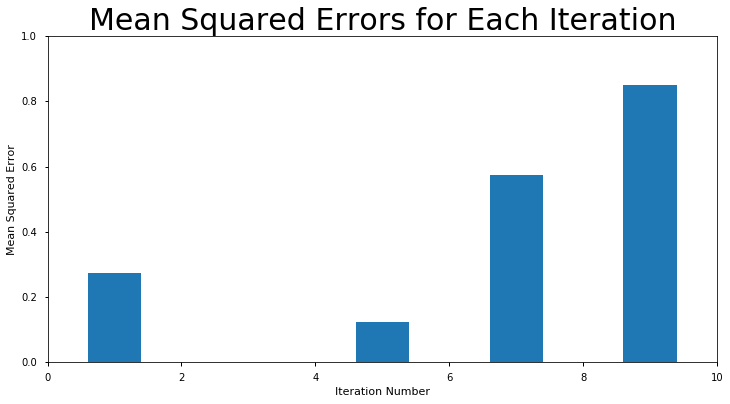

In [40]:
# plot below
f = plt.figure(121, figsize = (12,6))
plt.axis((0,10,0,1))
plt.title('Mean Squared Errors for Each Iteration', size=30)
plt.ylabel('Mean Squared Error')
plt.xlabel('Iteration Number')
plt.bar(np.arange(10), MSE_multiple_runs)
 
#raise NotImplementedError()

Briefly discuss your results. Would you observe the same results with the perceptron?

(3 points)

The data we are given is linearly separable, hence the perceptron is able to classify most of the animals correctly. In the exceptions where the model misclassified the data (with the animals dolphin, platypus, and bat), these data can be considered borderline data (it lies on the line that separates 'birds' and 'mammals'), and if more features were added to the feature weights, the model would be able to learn and understand the dataset better and correctly classify the data. 

The Multilayer Perceptron takes more time to train compared to the Perceptron. Training the Multilayer Perceptron is set by some parameters, like the number of iterations and the learning rate, for example. In our case, we were only allowed a certain number of iterations. It may be possible that this number of iterations is not enough for the Multilayer Perceptron to learn completely. Therefore I think that the Multilayer Perceptron would yield slightly more errors. 

## Generalizing  to new data

Let us now see how well the perceptron can generalize to unseen animals. Generalization happens when a model re-uses what it has learned in the training data to examples it did not see during training. 

You will have to prepare the test data in the same way as the training data: you will again need a matrix with all test examples (the input to the perceptron), and a target vector. Make sure that your use of zeros and ones matches mammals and birds in the same way that it did during the training phase!

( 2 points)

In [41]:
#import test data here
mammals_test = np.genfromtxt(open('./data/mammals_test.txt', "rb"), delimiter=",").T
mammals_tok_test = np.genfromtxt(open('./data/mammals_tok_test.txt', "rb"),dtype='str', delimiter=",")

birds_test = np.genfromtxt(open('./data/birds_test.txt', "rb"), delimiter=",").T
birds_tok_test = np.genfromtxt(open('./data/birds_tok_test.txt', "rb"),dtype='str', delimiter=",")

In [42]:
# create the training data matrix X_train, target vector y_train and a vector with the names of the animals
# X_test =  ...  
# y_test =  ...   
# test_tokens = ...


X_test = np.concatenate((birds_test, mammals_test))
y_test = np.concatenate((np.ones(15),np.zeros(15)))
test_tokens = np.concatenate((birds_tok_test, mammals_tok_test))

#raise NotImplementedError()

In [43]:
'''check shapes for test data '''
assert(X_test.shape == (30,16))


Now test the perceptron without re-training it on the data (i.e. using `net1.predict(X_test)`). This means that the network is now predicting the category of mammals and birds that it has not seen.

(2 points)

In [46]:
# net1_test_predictions = ...
# test_MSE = ...

net1 = Perceptron()
net1.fit(X_train,y_train)
net1_test_predictions = net1.predict(X_test)
test_MSE = mean_squared_error(net1_test_predictions,y_test)

test_MSE

# raise NotImplementedError()

0.1

In [47]:
'''check test set predictions'''
assert(len(net1_test_predictions) == len(X_test))


Discuss the results briefly (one or two sentences).
 
(2 points)

The Mean Squared Error is equal to 0.1. 

The Mean Squared Error is not equal to 0 because we fitted the model without retraining it. In addition, it is more prone to error because the model is dealing with data it has not trained with.

## Inspecting model predictions.
Which animals did the neural network not classify correctly? Complete the function below so that it prints the misclassified animals and the weight attributed to each feature.

( 2 points)

In [48]:
print(feats)
for index, true_label in enumerate(y_test):
    if net1_test_predictions[index]!=true_label: # if prediction does not match the true category
        # here, print the name of the animal corresponding to the index
        print(test_tokens[index])
        # below, print the feature weights of the animal corresponding to the index
        print(X_test[index])
    # raise NotImplementedError()

['beh_-_eats' 'beh_-_eats_grass' 'beh_-_flies' 'has_4_legs' 'has_a_beak'
 'has_a_tail' 'has_feathers' 'has_fur' 'has_hooves' 'has_horns' 'has_legs'
 'has_wings' 'is_brown' 'is_fast' 'is_large' 'is_small']
dolphin
[0.10344828 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
platypus
[0.         0.         0.         0.         0.16666667 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
bat
[0.         0.         0.22352941 0.         0.         0.
 0.         0.12941176 0.         0.         0.         0.30588235
 0.         0.         0.         0.07058824]


Can you find an explanation for that? Looking at the weights that the network learned in conjunction with the McRae features (corresponding to the `feats` file) the weights operate on might help you answer the question. 

First print out the weights of the perceptron by using the `net1.coef_` function.

(1 point)

In [49]:
# code here
net1.coef_

#raise NotImplementedError()

array([[ 0.02886248, -0.11827957,  0.24719101, -0.27461641,  0.29714655,
        -0.06741573,  0.57451212, -0.06741573, -0.07865169, -0.55      ,
        -0.2853691 ,  0.3759046 , -0.07865169, -0.14606742, -0.16052632,
         0.05035971]])

Discuss the animals that the model failed to classify correctly using the learned weights of the model and the features of the misclassified animals.

(5 points)

The weights learned by the perceptron displayed by net1.coef_ refers to a 'bird' when it is a positive value, and refers to a 'mammal' when it is a negative value. Comparing the feature weights of the animals the model failed to classify, we can see that each animal contains a feature that is either not distinctive to either category or share features from both categories.

Dolphin

The animal 'dolphin' only has one defining feature which is 'eats'. The weight of 'eats' in the perceptron is 0.02886248, which is a relatively small positive number. This means that the feature 'eats' is not a clearly distinguishable feature (which means that 'eats' is a feature that is most probably commonly shared by most of the animals, both birds and mammals). However, since our Perceptron is linear, it is not quite flexible. Hence, despite the fact that 0.02886428 is a really small positive number, it is still a positive number, therefore the feature 'eats' is classified into a 'bird' feature. Since 'eats' is the only defining feature the animal 'dolphin' has, the Perceptron immediately classifies a 'dolphin' as a 'bird'.

Platypus

The animal 'Platypus' also only has one defining feature which is 'has a beak'. The weight of 'has_a_beak' is a positive number, and also one of the highest positive weight. This means that the property 'has_a_beak' is distinctive for the animal 'bird' (this feature is not commonly shared amongst mammals and is commonly shared amongst birds). Since this is the only defining feature for 'Platypus' and the Perceptron being linear, it immediately classifies 'Platypus' as a 'bird'.

Bat

The animal 'bat' is associated with both features from 'bird' (flies, has_wings) and 'mammal' (has_fur, is_small). Hence the perceptron is unable to classify to which group does the animal 'bat' fall in.



## Comparing models on the test set.
Now, calculate the MLP (`net2`) error on the test set. How does it compare to the single layer perceptron performance?

Frist print out the MSEs for `net2` below:

(3 points)

In [50]:
# net2_test_predictions = ...
# Calculate MSE 

net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=.08, max_iter=200)
net2.fit(X_train,y_train)
net2_test_predictions = net2.predict(X_test)
print (mean_squared_error(net2_test_predictions, y_test))

    
for index, true_label in enumerate(y_test):
    if net2_test_predictions[index]!=true_label: # if prediction does not match the true category
        # here, print the name of the animal corresponding to the index
        print(test_tokens[index])
        # below, print the feature weights of the animal corresponding to the index
        print(X_test[index])
        # raise NotImplementedError()



0.06666666666666667
platypus
[0.         0.         0.         0.         0.16666667 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        ]
bat
[0.         0.         0.22352941 0.         0.         0.
 0.         0.12941176 0.         0.         0.         0.30588235
 0.         0.         0.         0.07058824]


Now discuss the MSEs, the number of erroneous classifications, and the differences/similarities between animals the network was not able to classify.

The Mean Squared Error for net2 is 0.0667 which is lower than the MSE for net1 (0.1). This means that the predictions made by net2 are closer to the test data, hence implying that net2 is better at predicting data.
The Perceptron is linear whilst the Multilayer perceptron is exponential, hence the weights learned by the Multilayer Perceptron is not the same as the perceptron. The MLP learns different weights since it has a different architecture.

The Multilayer Perceptron correctly classifies 'Dolphin' whilst the single layer perceptron doesn't because the single layer perceptron isn't flexible enough to accommodate outlier data. So for the Perceptron to draw the best classification for the data, it has to learn that 'eats' is a bird feature.

Both models weren't able to distinguish 'Platypus' and 'Bat' correctly because their feature weights contain a specific weight that is a distinguishable feature of a bird (like how a platypus has a beak and how a bat is able to fly).

## Reliability 

Do ten iterations, where in each iteration you create the network (net2) again, train it and examine its performance on the training and test data. Remember to NOT fit the network on the test data. With the test set, the model is meant to predict the category of animals it has never seen before (i.e. animals it has not been trained on).

On the same graph, plot the performance of each iteration on the test set (using `plt.bar`). Don’t forget to add labels to both axes.

You can plot the test error on top of the train error in your bar plots by passing the parameter `bottom` in the `plt.bar()` function. Add separate labels for training and test error. 

(3 points)

Text(0,0.5,'Mean Squared Error')

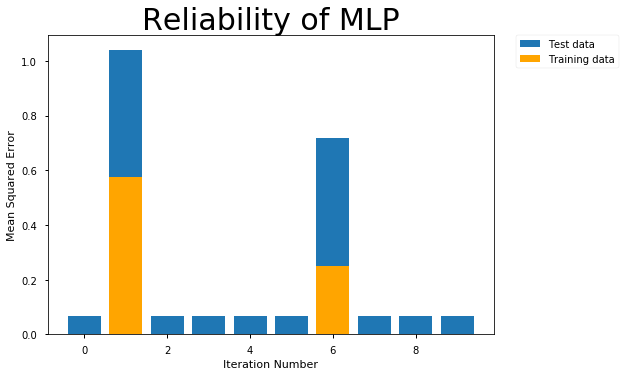

In [51]:
# code here

# MSE_train = []
# MSE_test = []
# for i in range(10):
#   ...
#   ...
  


MSE_train = []
MSE_test = []
for i in range(10):
    net2 = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=.08, max_iter=200)
    net2.fit(X_train,y_train)
    net_2_train_predictions = net2.predict(X_train)
    net_2_test_predictions = net2.predict(X_test)
    trainMSE = mean_squared_error(net_2_train_predictions, y_train)
    testMSE = mean_squared_error(net_2_test_predictions, y_test)
    
    MSE_train.append(trainMSE)
    MSE_test.append(testMSE)

MSE_train
MSE_test

plt.bar(np.arange(10), MSE_test, bottom=MSE_train, label='Test data')
plt.bar(np.arange(10), MSE_train, label='Training data', color = "orange")
plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

plt.title('Reliability of MLP', size = 30)
plt.xlabel('Iteration Number')
plt.ylabel('Mean Squared Error')
#raise NotImplementedError()

Discuss your observations briefly.

(2 points)

I have observed that there is a relationship between the errors in the training predictions and the corresponding test predictions. When you do not have an error in the training predictions, the test predictions is with a constant low Mean Squared Error. However, if you have errors in the predictions of the training data, you should expect to yield a rather high Mean Squared Error for the test predictions.

The iterations with the low errors are the ones that misclassified bat and platypus, whilst the ones that yield a high error misclassified more than those two animals.

## Playing with parameters 
Experiment with the following parameters:
- Learning rate: change the learning rate settings  ($\texttt{learning_rate_init: e.g. `1, 0.1,0.01,0.001`) 
- Number of hidden layers and units vary the number of units in the hidden layer, and try to add a second hidden layer. (e.g. `(25,), (80,),(100,), (100,80), (100,100)`)
- Iterations: change the max number of iterations. E.g. `20,100,500,1000, 5000`

Follow the same procedure as before, running each simulation 10 times (for each new parameter).

**Notes**:


- To compare different parametrizations, you should plot the mean and standard error for the 10 runs of each model with a given parametrization. You can use np.mean np.std to compute these. You plot this through the `yerr` parameter in the `plt.bar()` function. You should pass two arrays to the plt.bar function: the means and the std  of different parametrizations.

- Make three plots. In each, vary either the learning rate, the number of hidden layers and the iterations.

(10 points) 

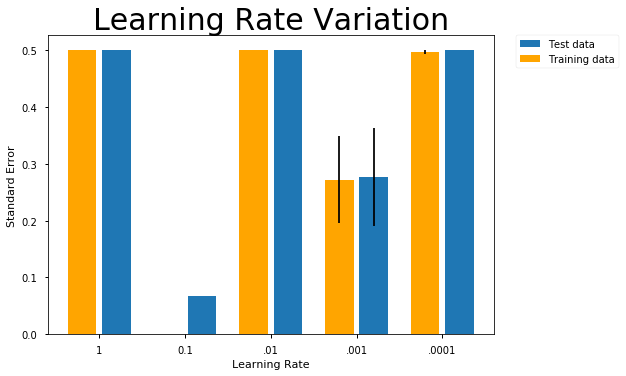

In [52]:
#code here for plot 1 (learning rate)  -- 4 pts

MSE_mean = []
MSE_se = []
MSE_mean_train = []
MSE_se_train = []
for lr in [1,0.1,0.01,0.001,0.0001]:
    model_results = [] # an empty array is re-created for every learning rate value
    model_results_train = [] 
    for i in range(10):
        # create network with given learning rate
        network = MLPClassifier(activation='logistic', solver='sgd', tol=0,learning_rate_init=lr, max_iter=200)
        # fit network to training data
        network.fit(X_train,y_train)
        # predict on test data 
        network_prediction = network.predict(X_test)
        # predict on train data
        network_prediction_train = network.predict(X_train)
        # compute MSE of predictions on test data
        network_MSE = mean_squared_error(network_prediction, y_test)
        # compute MSE of predicitions on train data
        network_MSE_train = mean_squared_error(network_prediction_train, y_train)
        # append to model_results
        model_results.append(network_MSE)
        model_results_train.append(network_MSE_train)
    # at the end of the for loop 
    # append the mean to MSE_mean array
    MSE_mean.append(np.mean(model_results))
    MSE_mean_train.append(np.mean(model_results_train))
    # append the std to MSE_se array
    MSE_se.append(np.std(model_results)/2)
    MSE_se_train.append(np.std(model_results_train)/2)
    
# Make plot here

f = plt.figure()
plt.bar(np.arange(5)+0.2, MSE_mean, yerr = np.array(MSE_se), width=1/3, label='Test data')
plt.bar(np.arange(5)-0.2, MSE_mean_train, yerr = np.array(MSE_se_train), width=1/3, color = "orange", label='Training data')
    
# to re-name the tick labels for each bar, use:    
plt.xticks(np.arange(5), ['1', '0.1','.01', '.001', '.0001']);

plt.title('Learning Rate Variation', size=30)
plt.xlabel('Learning Rate')
plt.ylabel('Standard Error')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)


# raise NotImplementedError()

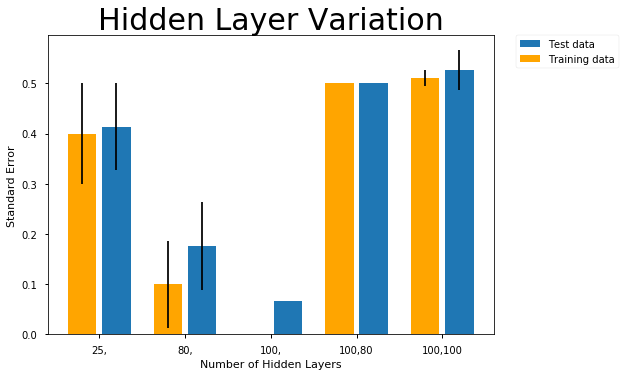

In [53]:
#code here for plot 2 (hidden layers)  -- 3 pts
MSE_mean = []
MSE_se = []
MSE_mean_train = []
MSE_se_train = []

for hl in [(25,), (80,),(100,), (100,80), (100,100)]:
    model_results = []
    model_results_train = []
    for i in range(10):
     # create network with given hidden layers
        net2 = MLPClassifier(activation='logistic', solver='sgd',hidden_layer_sizes= hl, 
                             learning_rate_init=0.1, max_iter=250)
        net2.fit(X_train,y_train)
        net2_prediction = net2.predict(X_test)
        net2_prediction_train = net2.predict(X_train)
        net2_MSE = mean_squared_error(net2_prediction, y_test)
        net2_MSE_train = mean_squared_error(net2_prediction_train, y_train)
        model_results.append(net2_MSE)
        model_results_train.append(net2_MSE_train)
    MSE_mean.append(np.mean(model_results))
    MSE_mean_train.append(np.mean(model_results_train))
    MSE_se.append(np.std(model_results)/2)
    MSE_se_train.append(np.std(model_results_train)/2)

f = plt.figure()
plt.bar(np.arange(5)+0.2, MSE_mean, yerr = np.array(MSE_se), width = 1/3, label='Test data')
plt.bar(np.arange(5)-0.2, MSE_mean_train, yerr = np.array(MSE_se_train), color="orange", width = 1/3, label='Training data')
    
# to re-name the tick labels for each bar, use:    
plt.xticks(np.arange(5), ['25,', '80,','100,', '100,80', '100,100']);

plt.title('Hidden Layer Variation', size=30)
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Standard Error')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

# raise NotImplementedError()

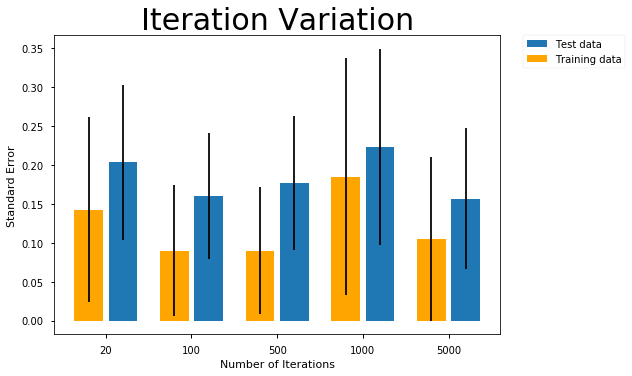

In [56]:
#code here for plot 3 (max-iter)  -- 3 pts

MSE_mean = []
MSE_se = []
MSE_mean_train = []
MSE_se_train = []


for it in [20,100,500,1000, 5000]: 
    model_results = []
    model_results_train = []
    for i in range(10):      
         # create network with given hidden layers
        net3 = MLPClassifier(activation='logistic', solver='sgd', tol=0, learning_rate_init=0.08, max_iter=it)
        net3.fit(X_train,y_train)
        net3_prediction = net3.predict(X_test)
        net3_prediction_train = net3.predict(X_train)
        net3_MSE = mean_squared_error(net3_prediction, y_test)
        net3_MSE_train = mean_squared_error(net3_prediction_train, y_train)
        model_results.append(net3_MSE)
        model_results_train.append(net3_MSE_train)
    MSE_mean.append(np.mean(model_results))
    MSE_mean_train.append(np.mean(model_results_train))
    MSE_se.append(np.std(model_results)/2)
    MSE_se_train.append(np.std(model_results_train)/2)

f = plt.figure()
plt.bar(np.arange(5)+0.2, MSE_mean, yerr = np.array(MSE_se), width = 1/3, label='Test data')
plt.bar(np.arange(5)-0.2, MSE_mean_train, yerr = np.array(MSE_se_train), color='orange', width = 1/3, label='Training data')

# to re-name the tick labels for each bar, use:    
plt.xticks(np.arange(5), ['20', '100','500', '1000', '5000']);

plt.title('Iteration Variation', size=30)
plt.xlabel('Number of Iterations')
plt.ylabel('Standard Error')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)
#raise NotImplementedError()

What is the best result you get on the training and test set, respectively? What were the corresponding parameter settings? Discuss your results and the effect of each parameter on the performance of the model.

You might want to have a look at Chapter 6 in "An Introduction to Neural Networks" (Gurney, 1997) for information.

(8 points)

MSE of Test Data = [0.06]
MSE of Training Data = [0.0]


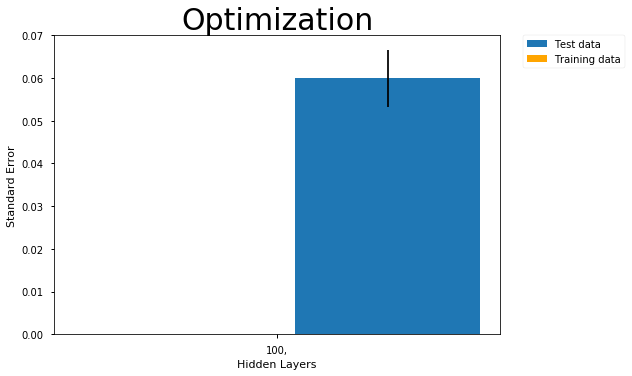

In [55]:
MSE_mean = []
MSE_se = []
MSE_mean_train = []
MSE_se_train = []

for h2 in [(100,)]:
    model_results = []
    model_results_train = []
    for i in range(10):
     # create network with optimum parameters
        net2 = MLPClassifier(activation='logistic', solver='sgd',hidden_layer_sizes= h2, 
                             learning_rate_init=0.1, max_iter=100)
        net2.fit(X_train,y_train)
        net2_prediction = net2.predict(X_test)
        net2_prediction_train = net2.predict(X_train)
        net2_MSE = mean_squared_error(net2_prediction, y_test)
        net2_MSE_train = mean_squared_error(net2_prediction_train, y_train)
        model_results.append(net2_MSE)
        model_results_train.append(net2_MSE_train)
    MSE_mean.append(np.mean(model_results))
    MSE_mean_train.append(np.mean(model_results_train))
    MSE_se.append(np.std(model_results)/2)
    MSE_se_train.append(np.std(model_results_train)/2)

f = plt.figure()
plt.bar(np.arange(1)+0.2, MSE_mean, yerr = np.array(MSE_se), width = 1/3, label='Test data')
plt.bar(np.arange(1)-0.2, MSE_mean_train, yerr = np.array(MSE_se_train), color="orange", width = 1/3, label='Training data')
    
# to re-name the tick labels for each bar, use:    
plt.xticks(np.arange(1), ['100,']);

plt.title('Optimization', size=30)
plt.xlabel('Hidden Layers')
plt.ylabel('Standard Error')

plt.legend(bbox_to_anchor=(1.05,1), loc=2, borderaxespad=0)

print('MSE of Test Data =',MSE_mean) 
print('MSE of Training Data =',MSE_mean_train)

It turns out that varying the parameters for the Multilayer Perceptron - such as the learning rate, number of hidden layers, number of units in the hidden layers, and the number of iterations - yields different Mean Squared Errors. By plotting a graph of each parameter change, I was able to see which settings allowed me to gain the best results (the ones with the least Mean Squared Error). 

Learning Rate Variation

From the graph it is evident that the Learning Rate that yields the least Mean Squared Error is 0.1, with a Mean Squared error of 0.0 for Training data and around 0.06 for the Test data. Although it is true that a smaller learning rate yields more accuracy, the dataset we are working with is relatively small, hence a learning rate of 0.1 is enough for the model to converge to the desired minima.

Hidden Layer Variation

The least standard error is possible with a single hidden layer with a number of units of 100. A possible explanation to this is that the dataset we are working with is relatively small and not complex, hence there is no need to use more than one hidden layer.

Iteration Variation

The number of iterations that gives the best result from the graph changes every run. However that was when the learning rate was set to 0.08. In the optimization graph I coded in the cell above, I set the learning rate to 0.1 and changed the value of the maximum number of iterations (max_iter) from 20, 100, 500, 1000, and 5000, and found out that the least Mean Squared Error is obtained when the maximum number of iterations is 100. A small number of iterations (e.g. 20) is not enough for the Perceptron to learn the data. However, it is unreasonable to use the higher number of iterations (e.g. 500, 1000, and 5000) when the best result can be obtained with just 100 iterations.

# <a id='references'>References</a> 
[1] [K. McRae, G.S. Cree, M.S. Seidenberg, C. McNorgan. 2005. Semantic Feature Production Norms for a Large Set of Living and Nonliving Things. Behavior Research Methods, 37(4):547-59.](https://link.springer.com/content/pdf/10.3758/BF03192726.pdf)
